In [1]:
import os 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns


In [2]:
os.chdir('E:\\Datasets\\Kaggle')

In [3]:
os.listdir()

['train.csv']

In [4]:
data = pd.read_csv(os.listdir()[0],header=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
data.drop('Id',axis=1,inplace=True)

In [7]:
data.Cover_Type.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [8]:
correlation = data.corr()

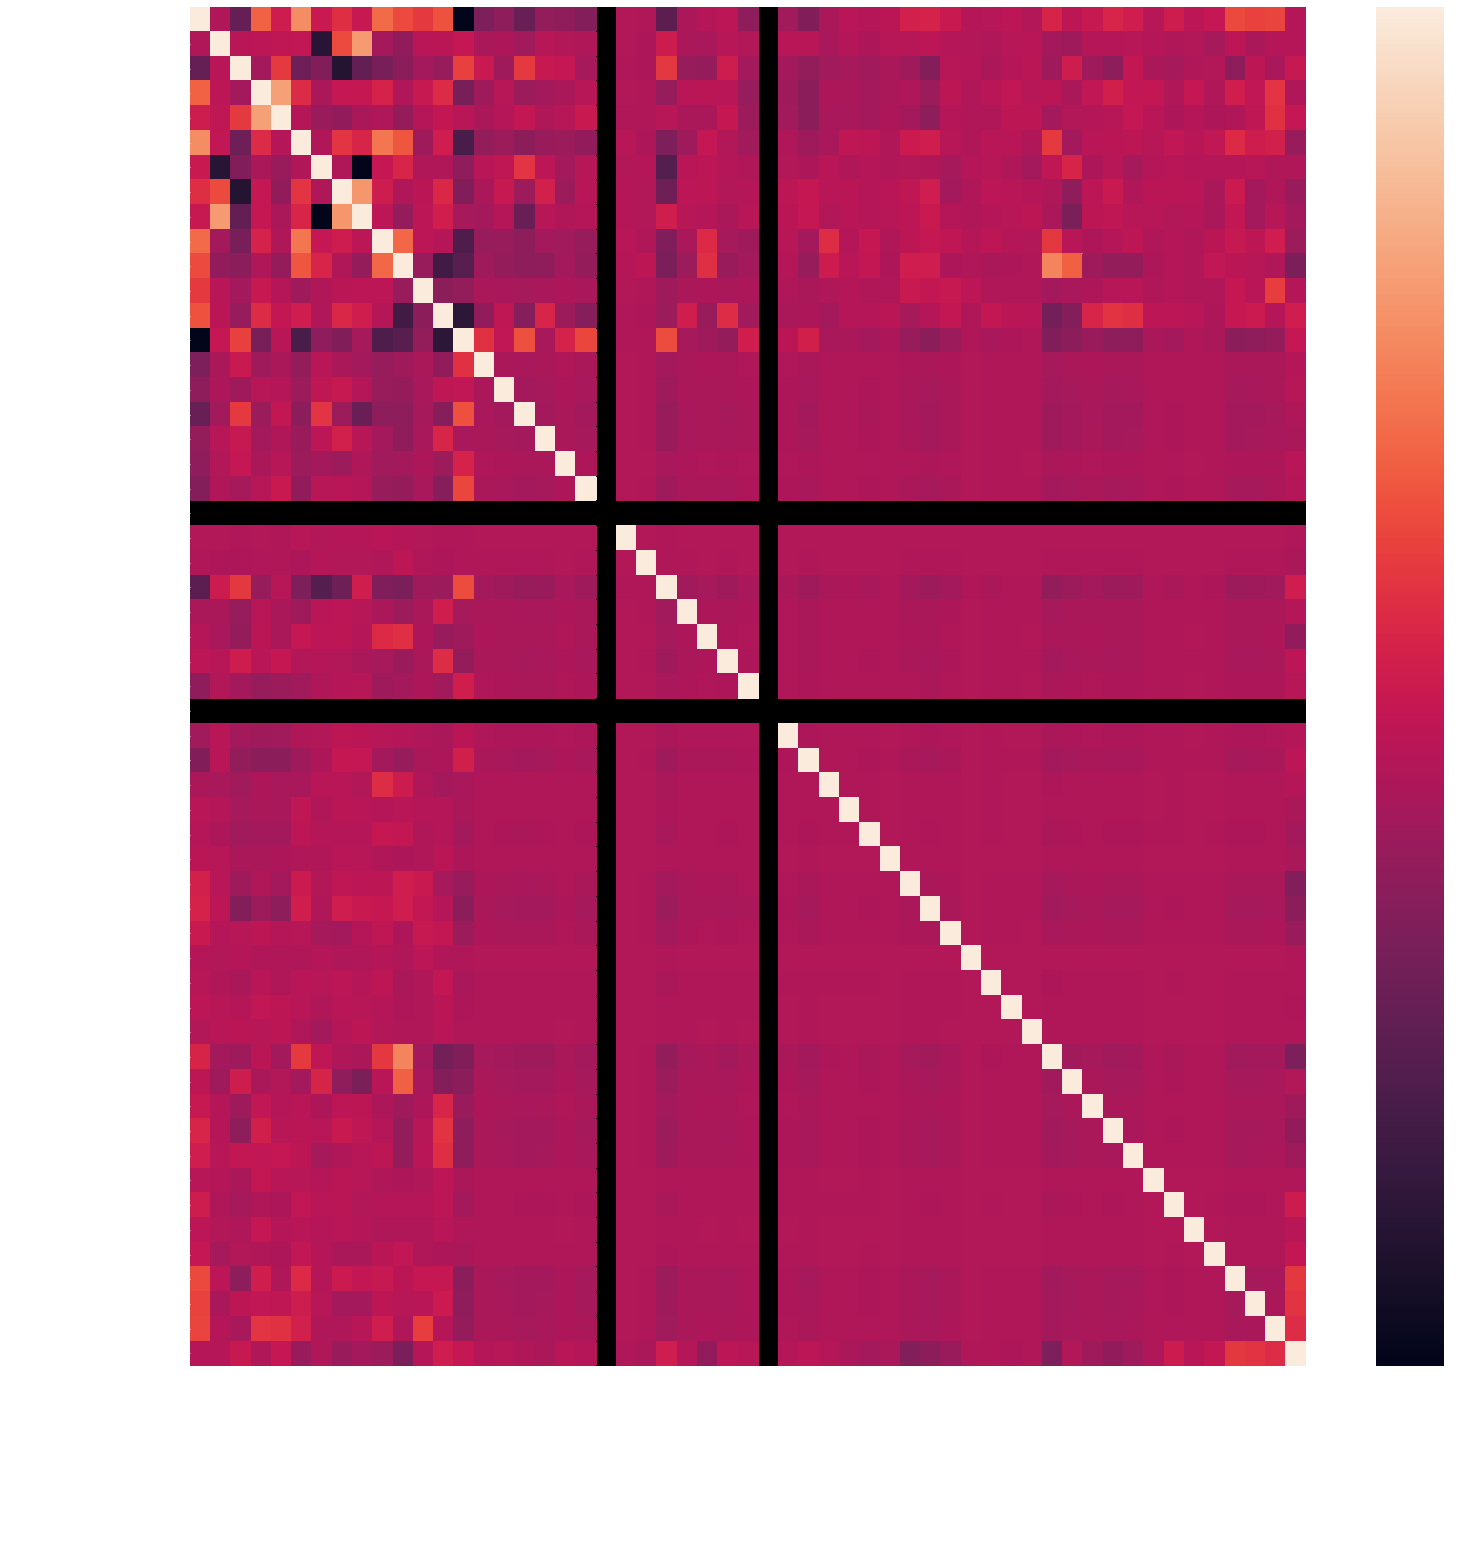

In [9]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation)
plt.show()

In [10]:
sum(data.Soil_Type7 == data.Soil_Type15)

15120

Based on the above the Soil column Type7 and 15 are same for all the observations and hence we can drop one of the column as have both doesn't add any advantage to the prediction

In [12]:
data.drop(['Soil_Type7','Soil_Type15'],axis=1,inplace=True)

In [33]:
correlation = data.corr()

In [34]:
corr_gt_6 = data.columns[correlation[(correlation > 0.6) & (correlation != 1)].any()].values.tolist()

In [36]:
data[corr_gt_6]

,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_3pm
0,51,258,0,232,148
1,56,212,-6,235,151
2,139,268,65,238,135
3,155,242,118,238,122
4,45,153,-1,234,150
5,132,300,-15,237,140
6,45,270,5,225,138
7,49,234,7,230,144
8,45,240,56,221,133
9,59,247,11,219,124


In [37]:
data1 = pd.concat([data[corr_gt_6],data.Cover_Type],axis=1)

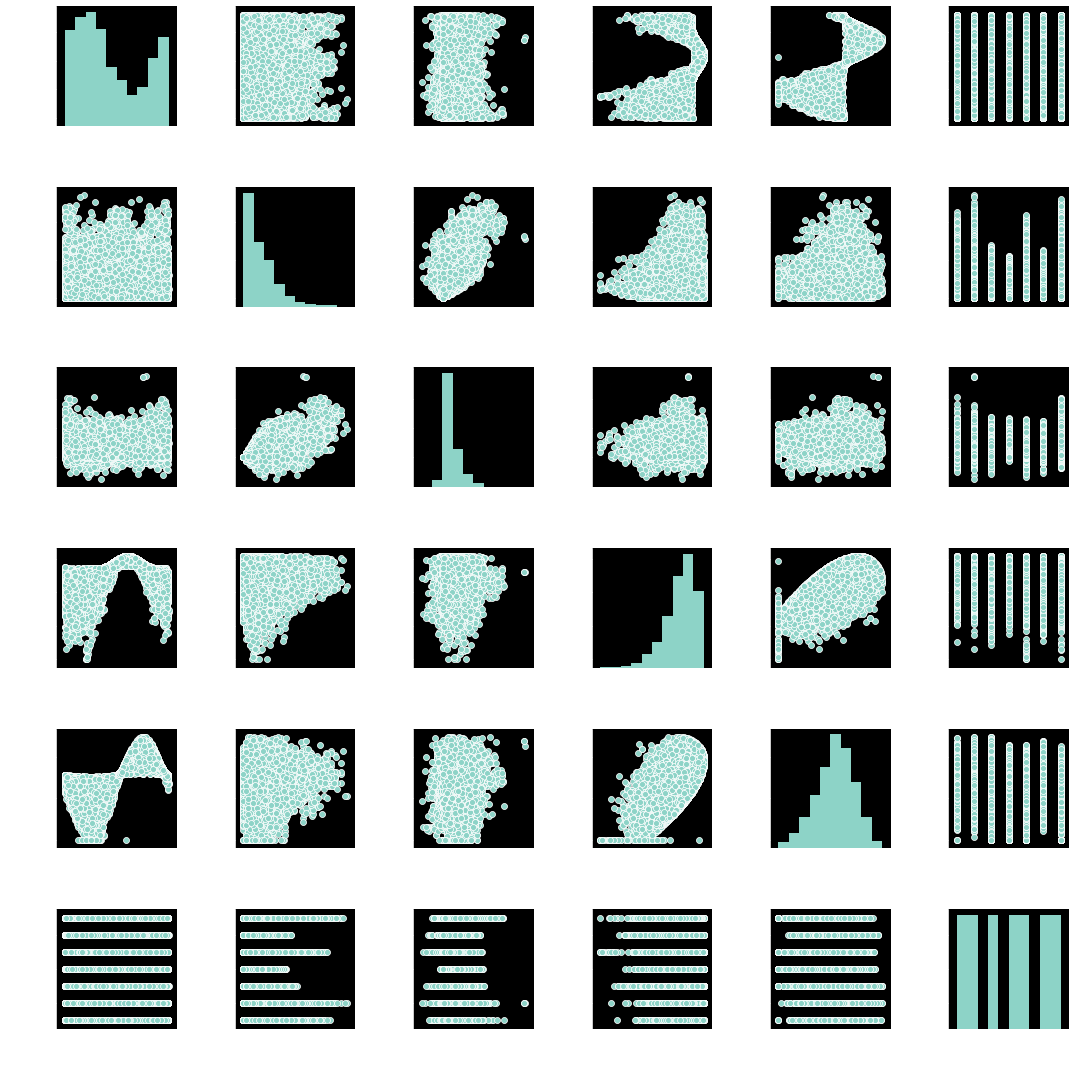

In [39]:
sns.pairplot(data=data1);

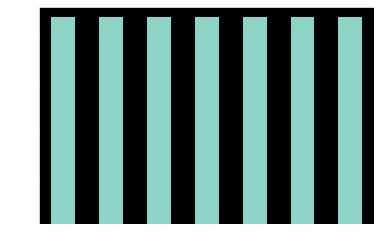

In [21]:
data.Cover_Type.value_counts().plot.bar()

In [20]:
data.Cover_Type.value_counts(ascending=False)

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [40]:
os.getcwd()

'E:\\Datasets\\Kaggle'

In [45]:
os.chdir('E://Datasets//Sensor//task')

In [46]:
os.listdir()

['task_data.csv', 'task_description.txt']

In [47]:
sensor = pd.read_csv(os.listdir()[0],header=0)

In [49]:
sensor.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [56]:
sensors = sensor.iloc[:,1:]

In [58]:
corr = sensors.corr()

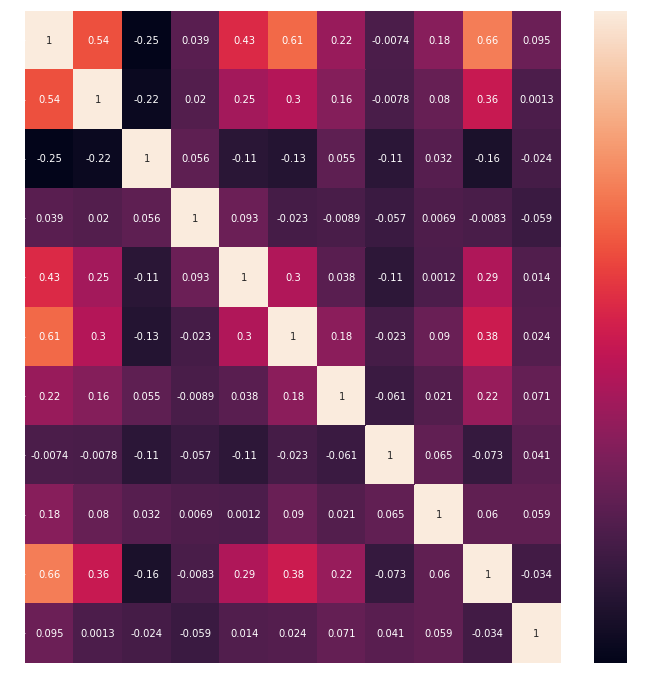

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

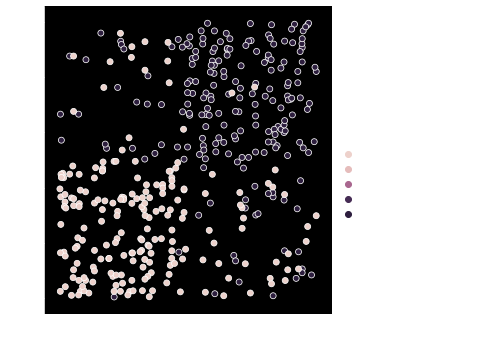

In [66]:
sns.relplot(x='sensor4',y='sensor8',hue='class_label',data=sensors)

In [68]:
sensors.class_label.value_counts()

-1.0    200
 1.0    200
Name: class_label, dtype: int64